## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

## Read File

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
temp = df.columns.values[0]
temp

'age'

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Checking Null Values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

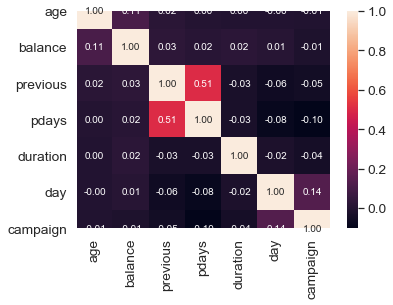

In [6]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Checking Outliers

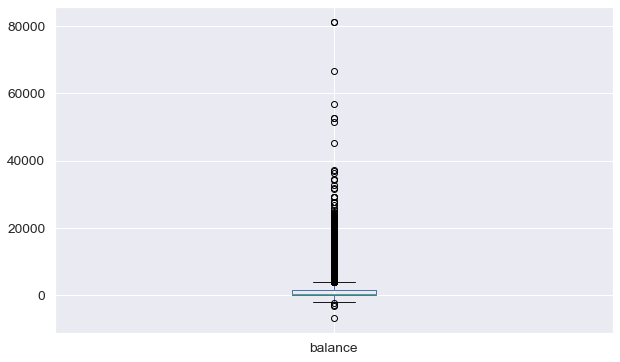

In [7]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [8]:
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [9]:
df.drop(df[df['balance']>1708].index,axis=0,inplace=True)

In [10]:
df.drop(df[df['balance']<122].index,axis=0,inplace=True)

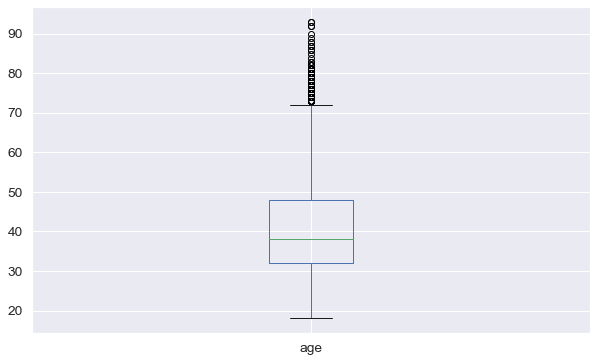

In [11]:
plt.figure(figsize=(10,6))
df.age.plot(kind='box')

In [12]:
df['age'].describe()

count    5589.000000
mean       40.385758
std        11.693628
min        18.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

In [13]:
df.drop(df[df['age']>48].index,axis=0,inplace=True)

In [14]:
df.drop(df[df['age']<32].index,axis=0,inplace=True)

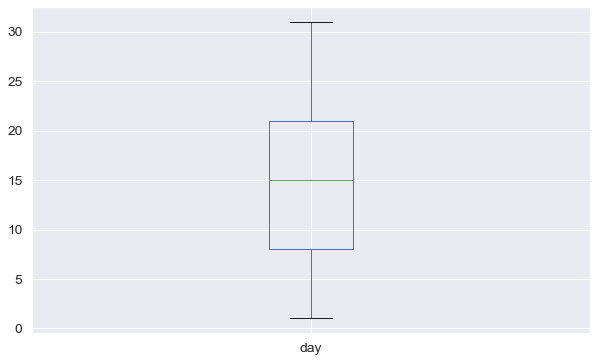

In [15]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [16]:
df['day'].describe()

count    2896.000000
mean       15.275552
std         8.346845
min         1.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

In [17]:
df.drop(df[df['day']>19].index,axis=0,inplace=True)

In [18]:
df.drop(df[df['day']<12].index,axis=0,inplace=True)

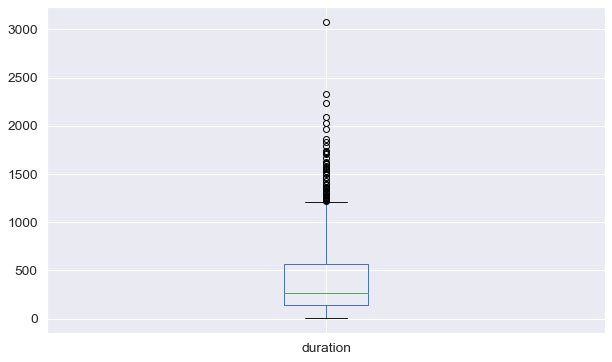

In [19]:
plt.figure(figsize=(10,6))
df.duration.plot(kind='box')

In [20]:
df['duration'].describe()

count     937.000000
mean      410.012807
std       396.044313
min         2.000000
25%       137.000000
50%       262.000000
75%       567.000000
max      3076.000000
Name: duration, dtype: float64

In [21]:
df.drop(df[df['duration']>290].index,axis=0,inplace=True)

In [22]:
df.drop(df[df['duration']<106].index,axis=0,inplace=True)

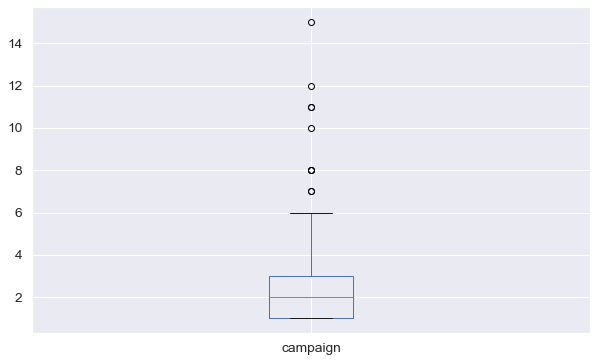

In [23]:
plt.figure(figsize=(10,6))
df.campaign.plot(kind='box')

In [24]:
df['campaign'].describe()

count    334.000000
mean       2.326347
std        1.881974
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: campaign, dtype: float64

In [25]:
df.drop(df[df['campaign']>3].index,axis=0,inplace=True)

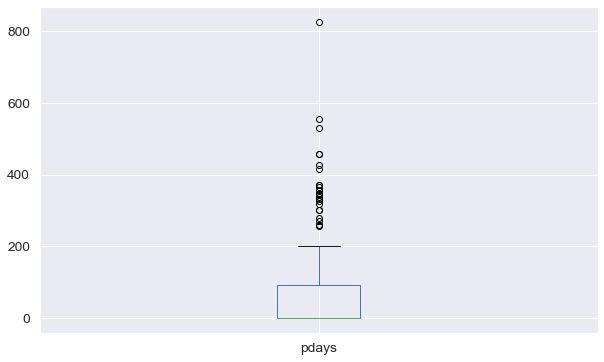

In [26]:
plt.figure(figsize=(10,6))
df.pdays.plot(kind='box')

In [27]:
df["pdays"].describe()

count    273.000000
mean      61.135531
std      122.505582
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       92.000000
max      826.000000
Name: pdays, dtype: float64

In [28]:
df.drop(df[df['pdays']>92].index,axis=0,inplace=True)

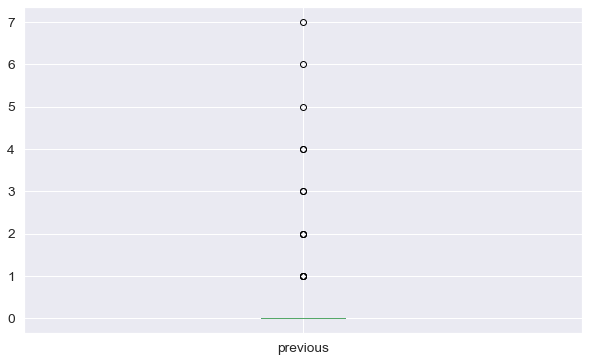

In [29]:
plt.figure(figsize=(10,6))
df.previous.plot(kind='box')

In [30]:
df['previous'].describe()

count    208.000000
mean       0.201923
std        0.899595
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: previous, dtype: float64

In [31]:
df.drop(df[df['previous']>0].index,axis=0,inplace=True)

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
939,35,unemployed,single,secondary,no,127,yes,no,telephone,14,nov,162,1,-1,0,unknown,yes
1250,44,admin.,married,tertiary,no,348,yes,yes,cellular,16,feb,170,2,-1,0,unknown,yes
1252,37,services,married,secondary,no,1543,yes,no,cellular,16,feb,138,2,-1,0,unknown,yes
1255,32,management,single,tertiary,no,312,no,no,cellular,17,feb,232,2,-1,0,unknown,yes
1260,47,technician,married,secondary,no,335,no,no,cellular,17,feb,226,1,-1,0,unknown,yes


## Data Pre-Processing

In [33]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [34]:
encoded_df = preprocessor(df)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
939,35,8,2,1,0,127,1,0,1,14,8,162,1,-1,0,0,1
1250,44,0,1,2,0,348,1,1,0,16,3,170,2,-1,0,0,1


In [35]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

### Split Data into Train and Test data sets

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Build Decision Tree Model

### Decision Tree with Cart(Gini)

###### Decision Tree with depth 2

In [37]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Trining Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Trining Score 0.8258064516129032
Testing Score 0.8461538461538461


###### Decision Tree with depth 4

In [38]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Trining Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Trining Score 0.9032258064516129
Testing Score 0.7692307692307693


###### Decision Tree with depth 6

In [39]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Trining Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Trining Score 0.967741935483871
Testing Score 0.8205128205128205


###### Decision Tree with depth 8

In [40]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 1.0
Testing Score 0.8205128205128205


### Decision Tree with c4.5(entropy)

In [41]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.8129032258064516
0.8461538461538461


## Graphical Represetation of Tree

In [42]:
# pip install graphviz
# conda install graphviz
from io import StringIO


In [43]:
# from sklearn.externals.six import StringIO

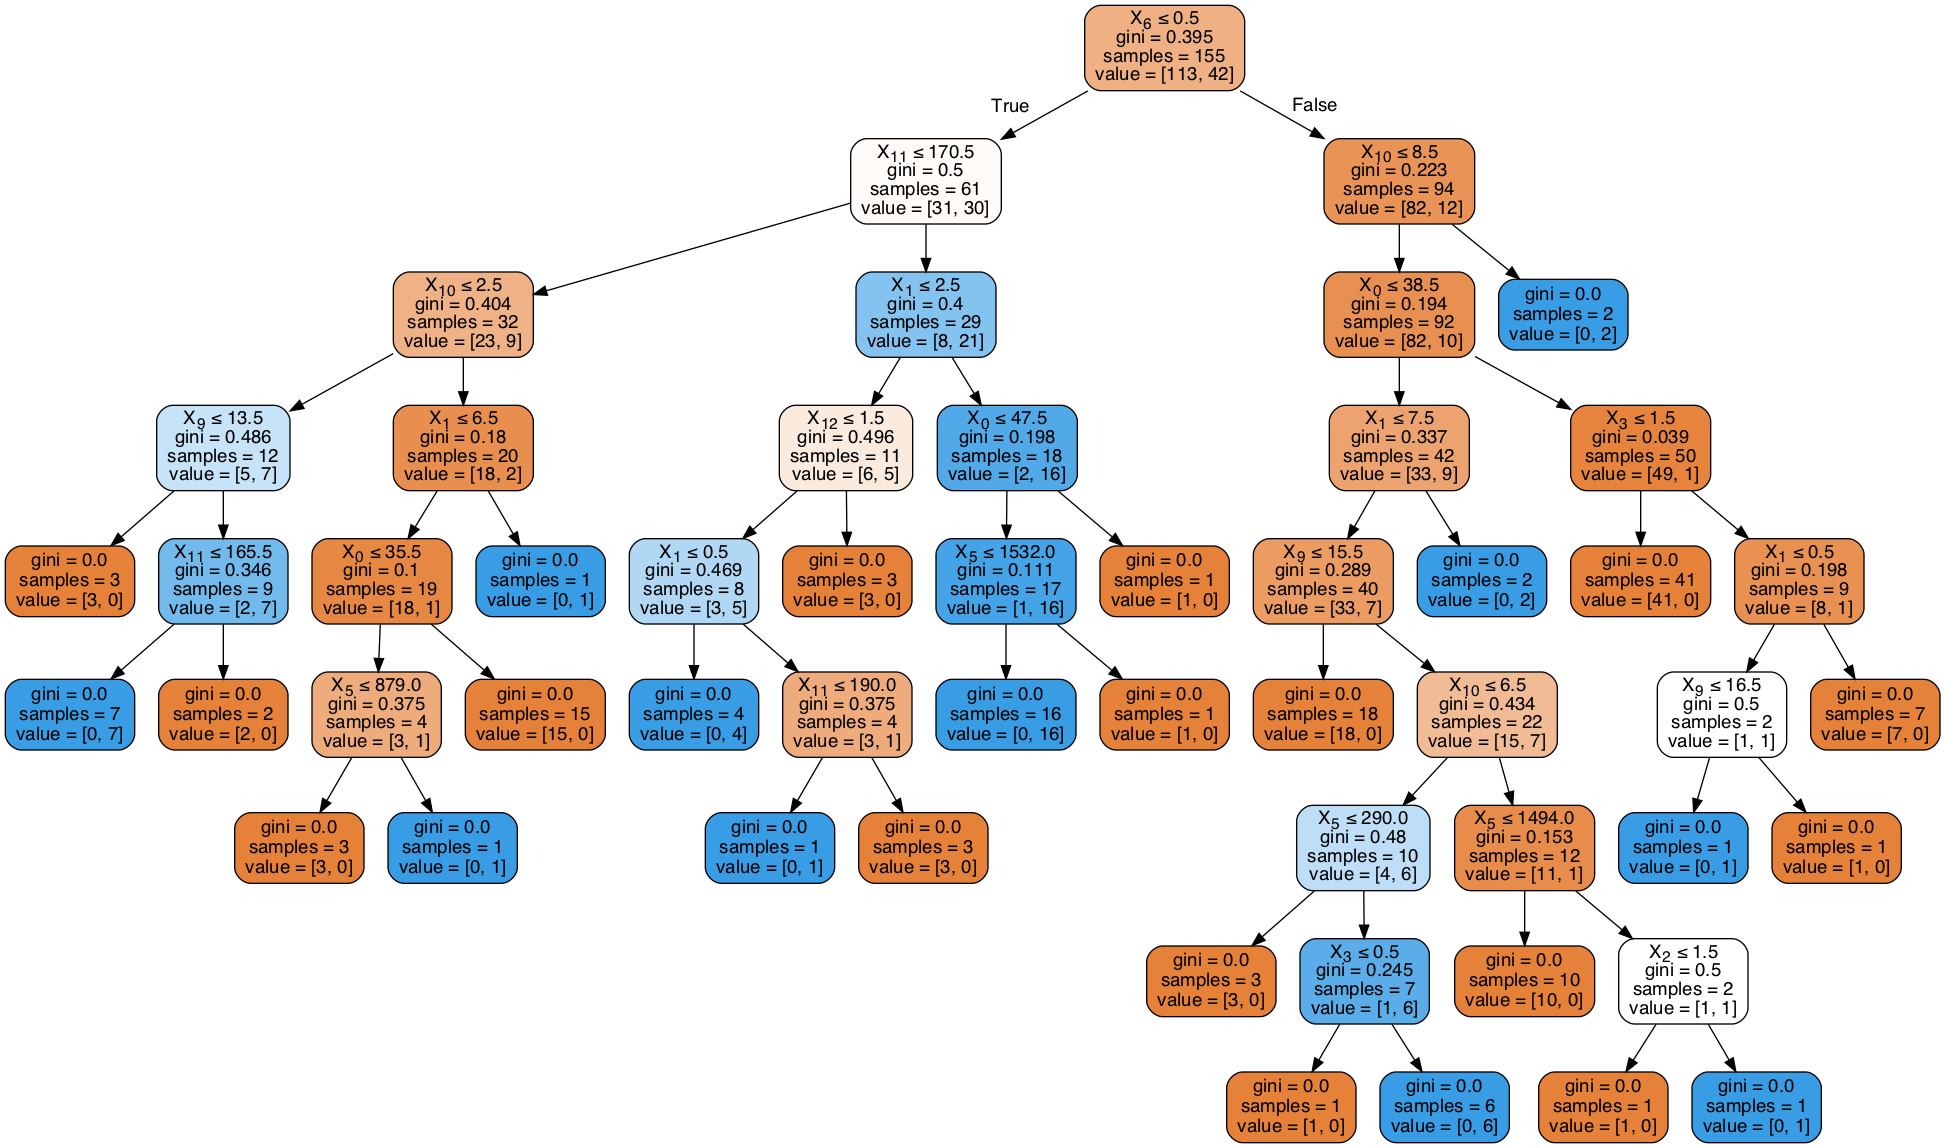

<Figure size 720x576 with 0 Axes>

In [44]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt_8,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Performance Matrics

In [45]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [46]:
predictions = model_dt_6.predict(x_test)
# print(predictions)

print(model_dt_6.score(x_test,y_test))
y_actual_result = y_test[0]
# print(y_actual_result)

0.8205128205128205


## Insert New Column with Prediction

In [47]:
print(predictions)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]


In [48]:
df_preditor_without_target = encoded_df.drop('deposit',axis=1).values
df_preditor_only_target = encoded_df['deposit'].values

In [49]:
print(df_preditor_only_target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [50]:
predictions1 = model_dt_6.predict(df_preditor_without_target)

In [51]:
print(predictions1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]


In [52]:
encoded_df['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [53]:
df['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [54]:
encoded_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test_data
939,35,8,2,1,0,127,1,0,1,14,8,162,1,-1,0,0,1,1
1250,44,0,1,2,0,348,1,1,0,16,3,170,2,-1,0,0,1,1
1252,37,6,1,1,0,1543,1,0,0,16,3,138,2,-1,0,0,1,1


In [55]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test_data
939,35,unemployed,single,secondary,no,127,yes,no,telephone,14,nov,162,1,-1,0,unknown,yes,1
1250,44,admin.,married,tertiary,no,348,yes,yes,cellular,16,feb,170,2,-1,0,unknown,yes,1
1252,37,services,married,secondary,no,1543,yes,no,cellular,16,feb,138,2,-1,0,unknown,yes,1


In [56]:
df['test_data'].replace(to_replace=1,value='True',inplace=True)

In [57]:
df['test_data'].replace(to_replace=0,value='False',inplace=True)

In [58]:
df.to_csv('Bank_with_Prediction_3_Point_Summary.csv')

## Area Under the Curve

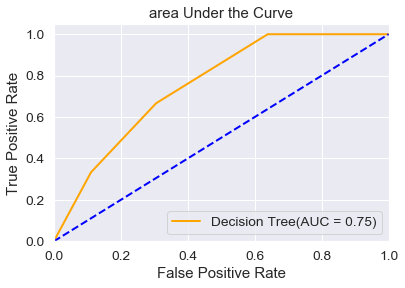

In [59]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Confusion Matrix

In [60]:
print(confusion_matrix(y_test,predictions))

[[30  6]
 [ 1  2]]


In [61]:
accuracy_score(y_test,predictions)

0.8205128205128205

In [62]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

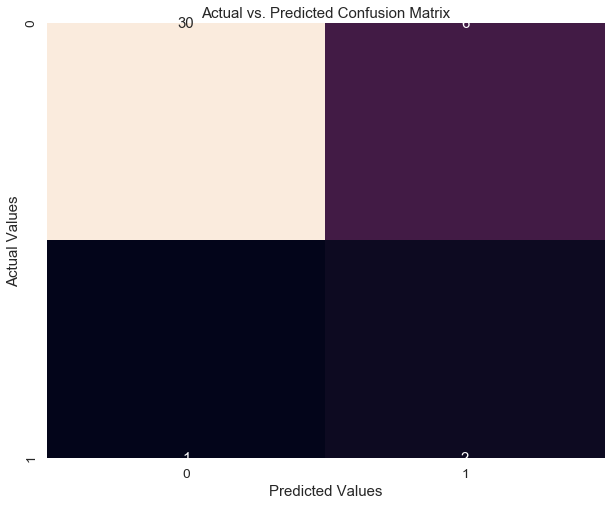

In [63]:
plt.figure(figsize=(10,8))
conf_mat = create_conf_mat(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()